# Countour Features

In [168]:
import numpy as np
import cv2 as cv

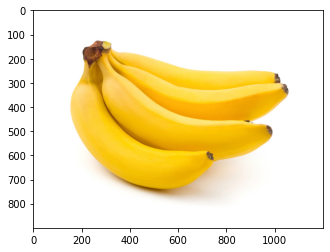

In [169]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
img = cv.imread('../images/bananos.jpg')
type(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

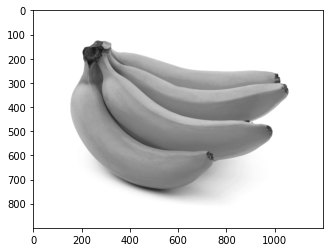

In [170]:
# Convert image to gray and blur it
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#img_gray = cv.blur(img_gray, (3,3))
plt.imshow(img_gray, cmap='gray');

Método OTSU determina umbral en: 202.0
Cantidad de Objetos detectados: 5


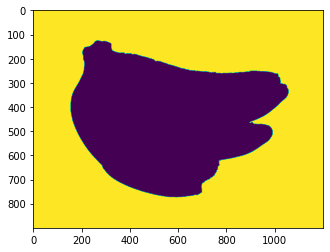

In [171]:
umbral,_ = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
print('Método OTSU determina umbral en:',umbral)
mascara = np.uint8((img_gray<umbral)*255)
output = cv2.connectedComponentsWithStats(mascara, 4, cv2.CV_32S)
cantidad_objetos = output[0]
labels = output[1]
stats = output[2]
print('Cantidad de Objetos detectados:',cantidad_objetos)
mascara = (np.argmax(stats[:,4][1:])+1==labels)
plt.imshow(mascara);
# ¿Cómo rellenar huecos?
from scipy import ndimage
mascara = ndimage.binary_fill_holes(mascara).astype(int)
mascara = np.uint8(mascara+255)
plt.imshow(mascara);

In [172]:
contours,_ = cv.findContours(mascara,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

## 1. Area

In [173]:
area = cv.contourArea(cnt)
area

1077901.0

## 2. Perimeter

In [174]:
perimeter = cv.arcLength(cnt,True)
perimeter

4196.0

## 3. ConvexHull

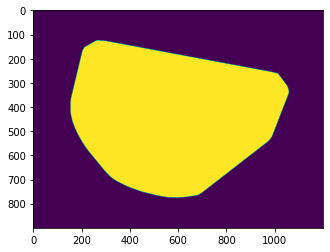

In [175]:
for c in contours:
    hull = cv2.convexHull(c)
    puntosConvexHull = hull[:, 0, :]
    m, n = mascara.shape
    ar = np.zeros((m,n))
    mascaraConvex = cv2.fillConvexPoly(ar, puntosConvexHull, 1)
    plt.imshow(mascaraConvex);

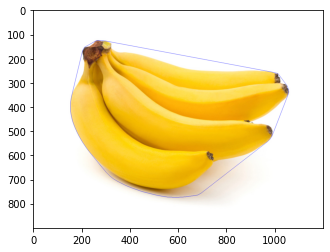

In [176]:
contours,_ = cv.findContours(np.uint8(mascaraConvex), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
convexhull = cv.drawContours(img,contours,-1,(0,0,255),1)
plt.imshow(convexhull);

## 4. Bounding Rectangle

#### 4.1 Straight Bounding Rectangle

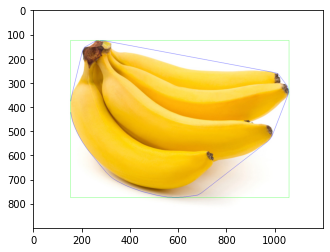

In [177]:
# get the bounding rect
x, y, w, h = cv2.boundingRect(cnt)
# draw a green rectangle to visualize the bounding rect
rectangulo1 = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.imshow(rectangulo1);

#### 4.2 Rotated Bounding Rectangle

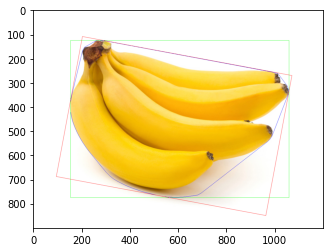

In [178]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
# convert all coordinates floating point values to int
box = np.int0(box)
# draw a red 'nghien' rectangle
rectangulo1 = cv2.drawContours(img, [box], 0, (255, 0, 0))
plt.imshow(rectangulo1);

## 5. Minimum Enclosing Circle

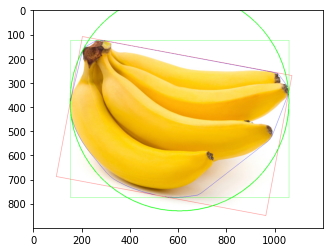

In [179]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
circle = cv.circle(img,center,radius,(0,255,0),2)
plt.imshow(circle);

## 6. Fitting an Ellipse

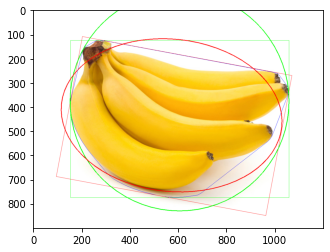

In [180]:
ellipse = cv.fitEllipse(cnt)
ellip = cv.ellipse(img,ellipse,(255,0,0),2)
plt.imshow(ellip);

## 7. Fitting a Line

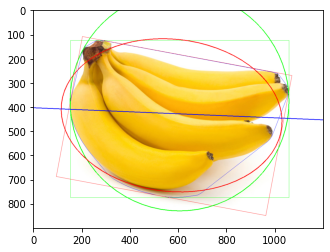

In [181]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line = cv.line(img,(cols-1,righty),(0,lefty),(0,0,255),2)
plt.imshow(line);